In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
print(tf.__version__)

2.3.0


In [2]:
import tensorflow as tf
from keras.utils import np_utils

fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)

# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)


# one hot encode the training labels and get the transpose
tr_y = np_utils.to_categorical(tr_y,10)
tr_y = tr_y.T
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y = np_utils.to_categorical(te_y,10)
te_y = te_y.T
print ("Shape of testing labels ", te_y.shape)

Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)


In [3]:
# Converting the numpy arrays to tensors
tr_x = tf.convert_to_tensor(tr_x, dtype=tf.float64)
tr_y = tf.convert_to_tensor(tr_y, dtype=tf.float64)
te_x = tf.convert_to_tensor(te_x, dtype=tf.float64)
te_y = tf.convert_to_tensor(te_y, dtype=tf.float64)

In [4]:
# Implementation of softmax
def softmax(previous_activations):
    t = tf.cast(tf.exp(previous_activations), tf.float64) # Numerator part of the softmax (exp(x))
    pred_probabilities = tf.cast(t / tf.reduce_sum(t, axis = 0, keepdims=True), tf.float64) # Summing along the rows (each column represents one data point)
    return pred_probabilities

In [5]:
def forward_pass(data, W1, b1, W2, b2):
    # Push the data through first hidden layer of the network and applying relu activation on it
    hypothesis_hidden_layer1 = tf.cast(tf.matmul(W1, tf.transpose(data)) + b1, tf.float64)
    activations_hidden_layer1 = tf.cast(tf.nn.relu(hypothesis_hidden_layer1), tf.float64)

    # Push the ouput of hidden layer 1 through the output layer with softmax activation function
    hypothesis_output_layer = tf.cast(tf.matmul(W2, activations_hidden_layer1) + b2, tf.float64)
    class_probabilities = tf.cast(softmax(hypothesis_output_layer), dtype = tf.float64)
    
    # returning the predictions
    return class_probabilities

In [6]:
def cross_entropy(_predictions, _true_labels):
    # Computing negative log likelihood, adding a small number within the log function to avoid log(0)
    loss = tf.cast(tf.reduce_mean(-tf.reduce_sum(_true_labels * tf.math.log(_predictions+1e-7), axis=0)), tf.float64)
    return loss

In [7]:
def calculate_accuracy(true_labels, predictions):
    predictions = tf.round(predictions) # Rounding off the decimal representation of softmax output to nearest integer(>0.5 to 1 and <0.5 to 0)
    
    # argmax to get the index of the predicted array, axis = 0 to get the index for each data point prediction
    accuracy = tf.cast(accuracy_score(np.argmax(predictions, axis = 0), np.argmax(true_labels, axis = 0)), tf.float64)
    return accuracy

In [8]:
# lists to store the loss and accuracy for train and test data
tr_loss = []
te_loss = []
tr_accuracy = []
te_accuracy = []

In [9]:
# Function to iterate and update the weigths and bias values using adam optimizer
def train(tr_x, W1, b1, W2, b2, tr_y, te_x, te_y):
    max_iterations = 1000
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    for i in range(max_iterations):
        # Record the computation
        with tf.GradientTape() as tape:
            predictions = forward_pass(tr_x, W1, b1, W2, b2)
            train_loss = cross_entropy(predictions, tr_y)

        # Calculate the gradients
        gradients = tape.gradient(train_loss, [W1, b1, W2, b2])
        train_accuracy = calculate_accuracy(tr_y, predictions)

        test_predictions = forward_pass(te_x, W1, b1, W2, b2)
        test_loss = cross_entropy(test_predictions, te_y)
        test_accuracy = calculate_accuracy(te_y, test_predictions)
        
        tr_loss.append(train_loss)
        te_loss.append(test_loss)

        tr_accuracy.append(train_accuracy)
        te_accuracy.append(test_accuracy)

        # update the weights and bias values as per calculated gradients
        adam_optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
        
        print("Iteraions {}: train_loss: {} train_accuracy: {} test_loss: {} test_accuracy: {}".format(i, train_loss, train_accuracy, test_loss, test_accuracy))

In [10]:
# Defining the model
no_of_features = tr_x.shape[1]
no_of_hidden_neurons = 200
no_of_output_units = 10

# Declaring weights and bias for the NN
W1 = tf.Variable(tf.random.normal(shape=(no_of_hidden_neurons, no_of_features), seed=42, dtype=tf.float64) * 0.01)
b1 = tf.Variable([0], dtype=tf.float64)

W2 = tf.Variable(tf.random.normal(shape=(no_of_output_units, no_of_hidden_neurons), seed=42, dtype=tf.float64) * 0.01)
b2 = tf.Variable([0], dtype=tf.float64)

In [11]:
# Call train function and run it for specified number of iterations (max_iterations = 1000)
train(tr_x, W1, b1, W2, b2, tr_y, te_x, te_y)

Iteraions 0: train_loss: 2.3015614691689557 train_accuracy: 0.1 test_loss: 2.301661321083923 test_accuracy: 0.1
Iteraions 1: train_loss: 2.2645609360271823 train_accuracy: 0.1 test_loss: 2.2648045455385644 test_accuracy: 0.1
Iteraions 2: train_loss: 2.223711179886746 train_accuracy: 0.1 test_loss: 2.224249056118425 test_accuracy: 0.1
Iteraions 3: train_loss: 2.174008863409809 train_accuracy: 0.1 test_loss: 2.174828131730241 test_accuracy: 0.1
Iteraions 4: train_loss: 2.1163501119036074 train_accuracy: 0.1 test_loss: 2.1174825118691496 test_accuracy: 0.1
Iteraions 5: train_loss: 2.0519039787038063 train_accuracy: 0.1 test_loss: 2.053406449683797 test_accuracy: 0.1
Iteraions 6: train_loss: 1.9819681308810941 train_accuracy: 0.1 test_loss: 1.9838960999625972 test_accuracy: 0.1
Iteraions 7: train_loss: 1.907729072228169 train_accuracy: 0.1 test_loss: 1.9101175791091665 test_accuracy: 0.1
Iteraions 8: train_loss: 1.8302951336995825 train_accuracy: 0.1 test_loss: 1.8332051365808952 test_accu

Iteraions 66: train_loss: 0.5508510940035274 train_accuracy: 0.7552 test_loss: 0.5782325661851139 test_accuracy: 0.7417
Iteraions 67: train_loss: 0.5472360484961386 train_accuracy: 0.7575333333333333 test_loss: 0.575443603247902 test_accuracy: 0.7441
Iteraions 68: train_loss: 0.5438701965496491 train_accuracy: 0.7599333333333333 test_loss: 0.5714739802632803 test_accuracy: 0.7447
Iteraions 69: train_loss: 0.5399646046642192 train_accuracy: 0.76235 test_loss: 0.5685566975461542 test_accuracy: 0.7482
Iteraions 70: train_loss: 0.5361397764173057 train_accuracy: 0.7644 test_loss: 0.5646359409666607 test_accuracy: 0.7496
Iteraions 71: train_loss: 0.5330378270624454 train_accuracy: 0.7667 test_loss: 0.5615238153358899 test_accuracy: 0.7525
Iteraions 72: train_loss: 0.5299250004019231 train_accuracy: 0.7681166666666667 test_loss: 0.5592155817077672 test_accuracy: 0.7546
Iteraions 73: train_loss: 0.5265600813845848 train_accuracy: 0.7700333333333333 test_loss: 0.555584396807358 test_accuracy: 

Iteraions 130: train_loss: 0.4275793588434218 train_accuracy: 0.8252833333333334 test_loss: 0.4637309727834754 test_accuracy: 0.8073
Iteraions 131: train_loss: 0.42670684963874644 train_accuracy: 0.8254166666666667 test_loss: 0.46277301490442496 test_accuracy: 0.8079
Iteraions 132: train_loss: 0.42520155393959175 train_accuracy: 0.8263333333333334 test_loss: 0.4615038970800191 test_accuracy: 0.8084
Iteraions 133: train_loss: 0.4242834680833082 train_accuracy: 0.8269333333333333 test_loss: 0.4607311940148469 test_accuracy: 0.809
Iteraions 134: train_loss: 0.42349084692456934 train_accuracy: 0.8270333333333333 test_loss: 0.4599288240957665 test_accuracy: 0.8092
Iteraions 135: train_loss: 0.422149171927534 train_accuracy: 0.8280166666666666 test_loss: 0.4588356773849295 test_accuracy: 0.8099
Iteraions 136: train_loss: 0.42110090700076763 train_accuracy: 0.8284166666666667 test_loss: 0.4579034835010705 test_accuracy: 0.8102
Iteraions 137: train_loss: 0.4203356615133711 train_accuracy: 0.82

Iteraions 194: train_loss: 0.373514779235833 train_accuracy: 0.8502333333333333 test_loss: 0.4181058525448536 test_accuracy: 0.8326
Iteraions 195: train_loss: 0.3728623237645654 train_accuracy: 0.8506166666666667 test_loss: 0.4175988775680455 test_accuracy: 0.8332
Iteraions 196: train_loss: 0.3722507396802495 train_accuracy: 0.8511833333333333 test_loss: 0.41710837571703796 test_accuracy: 0.8336
Iteraions 197: train_loss: 0.37159899101186566 train_accuracy: 0.8511333333333333 test_loss: 0.4166289914411369 test_accuracy: 0.8331
Iteraions 198: train_loss: 0.3709062882165974 train_accuracy: 0.8516333333333334 test_loss: 0.4160619339603585 test_accuracy: 0.8346
Iteraions 199: train_loss: 0.3702296141975397 train_accuracy: 0.8519 test_loss: 0.4155294435602241 test_accuracy: 0.8343
Iteraions 200: train_loss: 0.3695972313650944 train_accuracy: 0.8521333333333333 test_loss: 0.4150531862065291 test_accuracy: 0.8346
Iteraions 201: train_loss: 0.3689810754302046 train_accuracy: 0.85265 test_loss:

Iteraions 257: train_loss: 0.33828611874541 train_accuracy: 0.8657 test_loss: 0.3924011856148012 test_accuracy: 0.8468
Iteraions 258: train_loss: 0.3375167814021597 train_accuracy: 0.8658333333333333 test_loss: 0.39189611843245664 test_accuracy: 0.8458
Iteraions 259: train_loss: 0.33701850543181633 train_accuracy: 0.8663333333333333 test_loss: 0.391470574848912 test_accuracy: 0.846
Iteraions 260: train_loss: 0.33674556974317493 train_accuracy: 0.866 test_loss: 0.3914086566095346 test_accuracy: 0.8467
Iteraions 261: train_loss: 0.3363904064397878 train_accuracy: 0.8662833333333333 test_loss: 0.3912117675521425 test_accuracy: 0.8458
Iteraions 262: train_loss: 0.3358129489784263 train_accuracy: 0.8665 test_loss: 0.3907587575940976 test_accuracy: 0.8474
Iteraions 263: train_loss: 0.3351403841591811 train_accuracy: 0.8669 test_loss: 0.3902801612457341 test_accuracy: 0.8466
Iteraions 264: train_loss: 0.33461486338920293 train_accuracy: 0.8670166666666667 test_loss: 0.3898575335070702 test_ac

Iteraions 321: train_loss: 0.311934500151402 train_accuracy: 0.8766166666666667 test_loss: 0.3756743735789166 test_accuracy: 0.8533
Iteraions 322: train_loss: 0.31163688808268575 train_accuracy: 0.8763 test_loss: 0.37566288805389614 test_accuracy: 0.8543
Iteraions 323: train_loss: 0.31136077121687356 train_accuracy: 0.8771166666666667 test_loss: 0.3754389033627101 test_accuracy: 0.8523
Iteraions 324: train_loss: 0.31103343806357203 train_accuracy: 0.87675 test_loss: 0.3753361752911141 test_accuracy: 0.8549
Iteraions 325: train_loss: 0.31070636830952136 train_accuracy: 0.8773666666666666 test_loss: 0.3751358222812387 test_accuracy: 0.8529
Iteraions 326: train_loss: 0.3103366049388785 train_accuracy: 0.8769 test_loss: 0.37491161369389786 test_accuracy: 0.8538
Iteraions 327: train_loss: 0.3099760248080677 train_accuracy: 0.87735 test_loss: 0.37476075338533116 test_accuracy: 0.8545
Iteraions 328: train_loss: 0.3095829274890531 train_accuracy: 0.8770333333333333 test_loss: 0.374419250426085

Iteraions 384: train_loss: 0.291021056538808 train_accuracy: 0.8842166666666667 test_loss: 0.3647241387201183 test_accuracy: 0.8569
Iteraions 385: train_loss: 0.29086743704405826 train_accuracy: 0.8842333333333333 test_loss: 0.3648927101577956 test_accuracy: 0.8574
Iteraions 386: train_loss: 0.2905311488424528 train_accuracy: 0.8844 test_loss: 0.36452481064676817 test_accuracy: 0.8574
Iteraions 387: train_loss: 0.29012236878414854 train_accuracy: 0.8845666666666666 test_loss: 0.36446466701869734 test_accuracy: 0.8572
Iteraions 388: train_loss: 0.2896238109102527 train_accuracy: 0.885 test_loss: 0.36392568878044873 test_accuracy: 0.8569
Iteraions 389: train_loss: 0.28920964698268925 train_accuracy: 0.8851666666666667 test_loss: 0.36384508377182767 test_accuracy: 0.8571
Iteraions 390: train_loss: 0.28890661740804247 train_accuracy: 0.8849666666666667 test_loss: 0.3635505526126438 test_accuracy: 0.8571
Iteraions 391: train_loss: 0.28869297947957345 train_accuracy: 0.8852666666666666 test_

Iteraions 447: train_loss: 0.2700363718351884 train_accuracy: 0.89295 test_loss: 0.3553825111255327 test_accuracy: 0.8615
Iteraions 448: train_loss: 0.2697314725315551 train_accuracy: 0.8928333333333334 test_loss: 0.35531034522476446 test_accuracy: 0.8621
Iteraions 449: train_loss: 0.2692854370347714 train_accuracy: 0.8929666666666667 test_loss: 0.3549942236544802 test_accuracy: 0.8621
Iteraions 450: train_loss: 0.268756101045258 train_accuracy: 0.8936166666666666 test_loss: 0.35466122982149545 test_accuracy: 0.8623
Iteraions 451: train_loss: 0.26831875717713743 train_accuracy: 0.8932666666666667 test_loss: 0.35448383925385946 test_accuracy: 0.8628
Iteraions 452: train_loss: 0.26803732269826513 train_accuracy: 0.8939833333333334 test_loss: 0.35433559299019307 test_accuracy: 0.8619
Iteraions 453: train_loss: 0.26785390348999094 train_accuracy: 0.8935333333333333 test_loss: 0.35446397454935524 test_accuracy: 0.8629
Iteraions 454: train_loss: 0.2676801037620463 train_accuracy: 0.894133333

Iteraions 510: train_loss: 0.2516476959793167 train_accuracy: 0.8998166666666667 test_loss: 0.34878109352837705 test_accuracy: 0.8646
Iteraions 511: train_loss: 0.2514207942097415 train_accuracy: 0.8995833333333333 test_loss: 0.3489080444424066 test_accuracy: 0.8655
Iteraions 512: train_loss: 0.25113338577241706 train_accuracy: 0.9002 test_loss: 0.3486354206414184 test_accuracy: 0.8643
Iteraions 513: train_loss: 0.25083351460675973 train_accuracy: 0.8999833333333334 test_loss: 0.34871640247049646 test_accuracy: 0.8661
Iteraions 514: train_loss: 0.25049416858617674 train_accuracy: 0.9003666666666666 test_loss: 0.3483973117385674 test_accuracy: 0.8651
Iteraions 515: train_loss: 0.25016211794863574 train_accuracy: 0.9003666666666666 test_loss: 0.3484182868658045 test_accuracy: 0.8662
Iteraions 516: train_loss: 0.2498281212350385 train_accuracy: 0.9008333333333334 test_loss: 0.3481773452127016 test_accuracy: 0.8653
Iteraions 517: train_loss: 0.24950991130028208 train_accuracy: 0.9007 test_

Iteraions 574: train_loss: 0.23652394696951906 train_accuracy: 0.9063833333333333 test_loss: 0.3455329966365084 test_accuracy: 0.8682
Iteraions 575: train_loss: 0.23608014582472672 train_accuracy: 0.9066666666666666 test_loss: 0.345285269793736 test_accuracy: 0.8673
Iteraions 576: train_loss: 0.23570723245697395 train_accuracy: 0.9066333333333333 test_loss: 0.3450808565577028 test_accuracy: 0.8677
Iteraions 577: train_loss: 0.23545185455802978 train_accuracy: 0.9067833333333334 test_loss: 0.34507002806481335 test_accuracy: 0.8678
Iteraions 578: train_loss: 0.2353033832549454 train_accuracy: 0.9069666666666667 test_loss: 0.34511156138892224 test_accuracy: 0.868
Iteraions 579: train_loss: 0.23520809983127322 train_accuracy: 0.9069166666666667 test_loss: 0.3451256751042798 test_accuracy: 0.8684
Iteraions 580: train_loss: 0.23508589583395195 train_accuracy: 0.90705 test_loss: 0.3452574244950265 test_accuracy: 0.8679
Iteraions 581: train_loss: 0.2349565384844612 train_accuracy: 0.9067833333

Iteraions 637: train_loss: 0.22361980689343594 train_accuracy: 0.9112833333333333 test_loss: 0.34376595779574165 test_accuracy: 0.8702
Iteraions 638: train_loss: 0.2236167212297889 train_accuracy: 0.91195 test_loss: 0.3438563881062038 test_accuracy: 0.8691
Iteraions 639: train_loss: 0.22301131948428318 train_accuracy: 0.9116166666666666 test_loss: 0.34337635060017274 test_accuracy: 0.8707
Iteraions 640: train_loss: 0.22238297064923923 train_accuracy: 0.9122666666666667 test_loss: 0.342904941542371 test_accuracy: 0.8699
Iteraions 641: train_loss: 0.22234523100423145 train_accuracy: 0.9121666666666667 test_loss: 0.34304522312643737 test_accuracy: 0.8696
Iteraions 642: train_loss: 0.22253803296592456 train_accuracy: 0.9120166666666667 test_loss: 0.34348715472875435 test_accuracy: 0.8702
Iteraions 643: train_loss: 0.22229896390012108 train_accuracy: 0.9123166666666667 test_loss: 0.34339124967365725 test_accuracy: 0.8701
Iteraions 644: train_loss: 0.2217740924356584 train_accuracy: 0.9122 t

Iteraions 700: train_loss: 0.21071512281504867 train_accuracy: 0.9177333333333333 test_loss: 0.341596793394762 test_accuracy: 0.8716
Iteraions 701: train_loss: 0.2104448334615315 train_accuracy: 0.9174833333333333 test_loss: 0.341472818884938 test_accuracy: 0.872
Iteraions 702: train_loss: 0.2102693574138042 train_accuracy: 0.9178666666666667 test_loss: 0.34151559213245225 test_accuracy: 0.872
Iteraions 703: train_loss: 0.2101485655163862 train_accuracy: 0.9178666666666667 test_loss: 0.3416033157205753 test_accuracy: 0.8713
Iteraions 704: train_loss: 0.21005264344906657 train_accuracy: 0.9174333333333333 test_loss: 0.34169860919924633 test_accuracy: 0.8715
Iteraions 705: train_loss: 0.20991855263062303 train_accuracy: 0.9180333333333334 test_loss: 0.34168656728203706 test_accuracy: 0.8712
Iteraions 706: train_loss: 0.20976200639755613 train_accuracy: 0.9173166666666667 test_loss: 0.34169359299016266 test_accuracy: 0.8714
Iteraions 707: train_loss: 0.20959969781830068 train_accuracy: 0.

Iteraions 764: train_loss: 0.19901306197335022 train_accuracy: 0.9226333333333333 test_loss: 0.3404864785334603 test_accuracy: 0.8734
Iteraions 765: train_loss: 0.19869779317107278 train_accuracy: 0.9228333333333333 test_loss: 0.3402532113527066 test_accuracy: 0.8731
Iteraions 766: train_loss: 0.1985396351584877 train_accuracy: 0.9229666666666667 test_loss: 0.3402534219527139 test_accuracy: 0.8731
Iteraions 767: train_loss: 0.19849748091613406 train_accuracy: 0.9227666666666666 test_loss: 0.34045342265344264 test_accuracy: 0.8734
Iteraions 768: train_loss: 0.19852163996281122 train_accuracy: 0.9230166666666667 test_loss: 0.3404881826758514 test_accuracy: 0.8726
Iteraions 769: train_loss: 0.19854389293164476 train_accuracy: 0.9229833333333334 test_loss: 0.3409213349562461 test_accuracy: 0.8732
Iteraions 770: train_loss: 0.19854196335447163 train_accuracy: 0.9227833333333333 test_loss: 0.3408506565244778 test_accuracy: 0.8717
Iteraions 771: train_loss: 0.19846245924884567 train_accuracy:

Iteraions 827: train_loss: 0.18897083656297367 train_accuracy: 0.927 test_loss: 0.3406492150947514 test_accuracy: 0.8742
Iteraions 828: train_loss: 0.18874995937916655 train_accuracy: 0.9270333333333334 test_loss: 0.3405217369021556 test_accuracy: 0.8741
Iteraions 829: train_loss: 0.18874093127154667 train_accuracy: 0.9269166666666667 test_loss: 0.34055239149604183 test_accuracy: 0.8746
Iteraions 830: train_loss: 0.18880604189983619 train_accuracy: 0.9268833333333333 test_loss: 0.3408779008369223 test_accuracy: 0.8743
Iteraions 831: train_loss: 0.18882324316147223 train_accuracy: 0.9271166666666667 test_loss: 0.3408043107957368 test_accuracy: 0.8741
Iteraions 832: train_loss: 0.18865178747425423 train_accuracy: 0.9269 test_loss: 0.34104629956986016 test_accuracy: 0.8744
Iteraions 833: train_loss: 0.18838879702774047 train_accuracy: 0.9272833333333333 test_loss: 0.3407914240451645 test_accuracy: 0.8744
Iteraions 834: train_loss: 0.18808316040802234 train_accuracy: 0.9273833333333333 tes

Iteraions 890: train_loss: 0.18128676336607896 train_accuracy: 0.9305 test_loss: 0.3430523599082428 test_accuracy: 0.8747
Iteraions 891: train_loss: 0.1811817165303049 train_accuracy: 0.93065 test_loss: 0.34289205259137295 test_accuracy: 0.876
Iteraions 892: train_loss: 0.18104014750255723 train_accuracy: 0.9305 test_loss: 0.34315086988103194 test_accuracy: 0.8748
Iteraions 893: train_loss: 0.18071327642892113 train_accuracy: 0.9307666666666666 test_loss: 0.34279423094769534 test_accuracy: 0.8758
Iteraions 894: train_loss: 0.1803248454372016 train_accuracy: 0.9305833333333333 test_loss: 0.3426797305877105 test_accuracy: 0.8757
Iteraions 895: train_loss: 0.17987139630624097 train_accuracy: 0.9313833333333333 test_loss: 0.34220574672911114 test_accuracy: 0.875
Iteraions 896: train_loss: 0.17946201870843978 train_accuracy: 0.9310166666666667 test_loss: 0.34223021394447034 test_accuracy: 0.8753
Iteraions 897: train_loss: 0.17912748274111345 train_accuracy: 0.93125 test_loss: 0.341917323325

Iteraions 953: train_loss: 0.17225683259056426 train_accuracy: 0.9341 test_loss: 0.3438185375594342 test_accuracy: 0.8762
Iteraions 954: train_loss: 0.17209944565519744 train_accuracy: 0.9346166666666667 test_loss: 0.34415739271070084 test_accuracy: 0.8759
Iteraions 955: train_loss: 0.1720315211332202 train_accuracy: 0.9348666666666666 test_loss: 0.34405622939478947 test_accuracy: 0.8768
Iteraions 956: train_loss: 0.17203609364425065 train_accuracy: 0.9343333333333333 test_loss: 0.34425459662021357 test_accuracy: 0.8762
Iteraions 957: train_loss: 0.17205180296745196 train_accuracy: 0.9347166666666666 test_loss: 0.34440514073356987 test_accuracy: 0.8763
Iteraions 958: train_loss: 0.17215105405101033 train_accuracy: 0.9339666666666666 test_loss: 0.3445920530819163 test_accuracy: 0.8758
Iteraions 959: train_loss: 0.17213344505573672 train_accuracy: 0.9349333333333333 test_loss: 0.34490791607398386 test_accuracy: 0.8761
Iteraions 960: train_loss: 0.17213563838987117 train_accuracy: 0.93376

In [12]:
import matplotlib.pyplot as plt

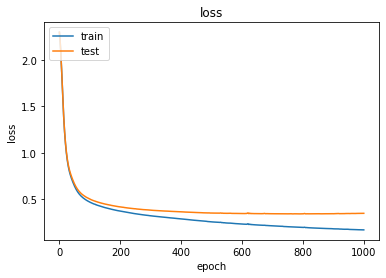

In [13]:
plt.plot(np.arange(1000), tr_loss)
plt.plot(np.arange(1000), te_loss)
plt.title("loss")
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper left')

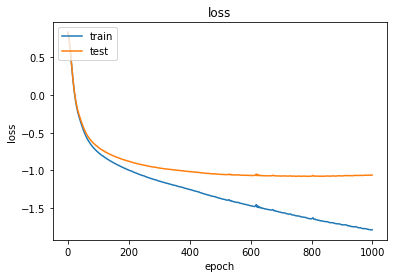

In [14]:
plt.plot(np.arange(1000), np.log(tr_loss))
plt.plot(np.arange(1000), np.log(te_loss))
plt.title("loss")
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper left')

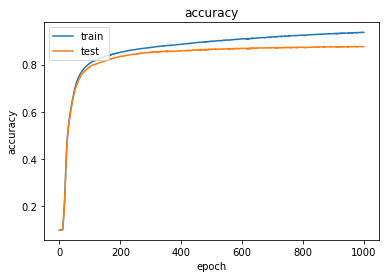

In [15]:
plt.plot(np.arange(1000), tr_accuracy)
plt.plot(np.arange(1000), te_accuracy)
plt.title("accuracy")
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')

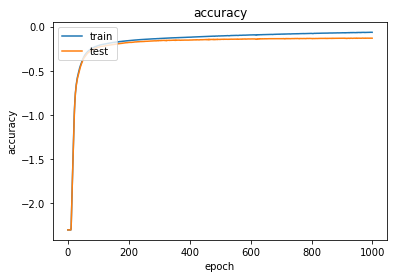

In [16]:
plt.plot(np.arange(1000), np.log(tr_accuracy))
plt.plot(np.arange(1000), np.log(te_accuracy))
plt.title("accuracy")
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')

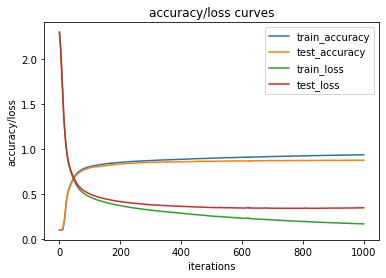

In [17]:
plt.plot(np.arange(1000), tr_accuracy)
plt.plot(np.arange(1000), te_accuracy)
plt.plot(np.arange(1000), tr_loss)
plt.plot(np.arange(1000), te_loss)
plt.title("accuracy/loss curves")
plt.xlabel('iterations')
plt.ylabel("accuracy/loss")
plt.legend(['train_accuracy', 'test_accuracy', 'train_loss', 'test_loss'], loc='upper right')

## We can use the upated weights and bias values to predict the classes of any MNIST feature data